In [1]:
# initial setup
try:
    # settings colab:
    import google.colab
    
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

ERROR:root:File `'common/0_notebooks_base_setup.py'` not found.


<h1>Desafio 3 - Grupo 5</h1>

<h3><u>Intregrantes del grupo</u></h3>

- Juan Pablo Ferrari
- Alejandro Jait
- Miriam Lanabere
- Panizza, Camila    

<h3><u>Objetivos</u></h3>
A partir del dataset seleccionado: "Información del Mapa de Oportunidades Comerciales"
nuestro objetivo será determinar cuál será el nivel de supervivencia para emprendedores y comerciantes 
a la hora de abrir o potenciar un comercio en la Ciudad Autónoma de Buenos Aires.
Para esto, contaremos con variables como: rubro, zona, información demográfica y facturación.


<h3><u>Índice</u></h3>
<a href='#section_1'>1. Preparación del dataset</a> 

<a href='#section_2'>2. Dataset final</a>  
<a href='#section_3'>3. Modelos implementados</a>  
<a href='#section_4'>4. Modelos + reducción de dimensionalidad</a>  
<a href='#section_5'>5. Modelos + Grid search</a> 

---
---
<b><a id='section_1'><h4>1. Preparación del dataset</h4></a></b>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score

In [7]:
def curva_roc_y_auc(y_pred_proba):
    fpr,tpr,_ = roc_curve(y_test, y_pred_proba[:,1])
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    plt.axis([0, 1.01, 0, 1.01])
    plt.xlabel('1 - Specificty')
    plt.ylabel('TPR / Sensitivity')
    plt.title('ROC Curve')
    plt.plot(df['fpr'],df['tpr'])
    plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
    plt.show() 
    print('AUC: ', auc(fpr, tpr))

In [8]:
def accuracy_method(df):
    final_df = df.sort_values(by=['accuracy_test'], ascending=False)
    print(final_df.head(9))
    
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes()
    ax.set_xticklabels(list(final_df['Metodo']))
    ax.set_xticks([0,1,2,3,4,5,6])
    plt.xlabel('Method')
    plt.ylabel('Accuracy')
    plt.title('Accuracy por método')
    plt.plot(list(final_df['accuracy_train']))
    plt.plot(list(final_df['accuracy_test']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    ax.legend(['Train','test'], loc='upper right', title = "Accuracy", frameon=True)
    plt.show()
    
    
    #plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
    plt.show() 
    

In [9]:
df_zonas = pd.read_csv('Data/zonas.csv', sep=';')
df_comercios = pd.read_csv('Data/COMERCIOS.TXT', sep='\t')


In [10]:
df_zonas

,MOC_ZONAS_ID,PK_TIEMPO_ID,POBLACION_FLOTANTE,POBLACION_VIVIENTE,POBLACION_TRABAJADORA,CANTIDAD_HOGARES,PRECIO_PROMEDIO_ALQUILER_LOCAL,PRECIO_MAX_ALQUILER_LOCAL,PRECIO_MIN_ALQUILER_LOCAL,SUPERFICIE_M2_PROMEDIO_ALQUILER,...,RUBRO_MENOS_PREDOMINANTE,PRECIO_PROMEDIO_VENTA_LOCAL,PRECIO_MAX_VENTA_LOCAL,PRECIO_MIN_VENTA_LOCAL,SUPERFICIE_M2_PROMEDIO_VENTA,SUPERFICIE_M2_MAX_VENTA,SUPERFICIE_M2_MIN_VENTA,NIVEL_LOCALES_RUBRO_PREDOMINANTE,NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE,FECHA
0,1,591673,3,6726,3732,2465,58128.80,162999.60,26000.00,322.26,...,HELADERIAS,1144213.52,2800000.0,25000.0,4918.06,7857.1,2720.6,1,1,2017-07-01 00:00:00.000
1,2,591673,5,589,348,255,34854.58,47068.93,20401.40,167.54,...,VETERINARIA,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017-07-01 00:00:00.000
2,3,591673,2,10764,5967,3622,10606.00,13311.99,7900.00,120.67,...,INSTITUCIONES DEPORTIVAS,273333.33,550000.0,60000.0,1662.77,2200.0,1166.7,1,1,2017-07-01 00:00:00.000
3,4,591673,2,6690,3927,2379,25500.53,150000.00,6436.93,154.71,...,VETERINARIA,286636.36,530000.0,90000.0,1416.98,2323.2,679.5,1,1,2017-07-01 00:00:00.000
4,5,591673,5,623,246,154,28014.00,28014.00,28014.00,304.50,...,INSTITUCIONES DEPORTIVAS,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017-07-01 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,157,591673,2,9242,5570,4176,24878.93,80000.00,4500.00,161.11,...,HELADERIAS,354350.00,775000.0,98000.0,2381.17,4583.3,1071.4,1,1,2017-07-01 00:00:00.000
157,158,591673,5,13367,7766,6034,40826.59,120000.00,6000.00,258.29,...,VETERINARIA,813875.00,4900000.0,87000.0,2476.37,6644.4,782.1,2,1,2017-07-01 00:00:00.000
158,159,591673,4,28140,17091,13149,63489.26,372107.50,2033.20,382.39,...,FIAMBRERIAS Y DIETETICAS,591166.67,3000000.0,85000.0,4213.53,20000.0,1271.2,3,5,2017-07-01 00:00:00.000
159,160,591673,3,42529,25740,19810,43519.26,109154.98,4138.04,416.57,...,HELADERIAS,990746.03,2000000.0,13000.0,6093.40,14000.0,505.1,5,2,2017-07-01 00:00:00.000


In [11]:
df_comercios.shape

(26082, 23)

In [12]:
df_zonas.rename(columns={'MOC_ZONAS_ID':'ID_ZONA'}, inplace=True)

In [13]:
df = df_comercios.join(df_zonas, how='left', on='ID_ZONA', lsuffix='', rsuffix='_df2')

In [14]:
df.drop(columns=['ID_ZONA_df2', 'PK_TIEMPO_ID', 'FECHA', 'PERIODO'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26082 entries, 0 to 26081
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID_ZONA                                    26082 non-null  int64  
 1   RUBRO                                      26082 non-null  object 
 2   NIVEL_RIESGO                               26082 non-null  int64  
 3   APERTURAS                                  26082 non-null  float64
 4   CIERRES                                    26082 non-null  float64
 5   SUPERVIVENCIA                              21473 non-null  float64
 6   PROMEDIO_VENTAS                            26082 non-null  int64  
 7   NIVEL_CRECIMIENTO                          23184 non-null  float64
 8   NIVEL_ESTABILIDAD                          24843 non-null  float64
 9   CANTIDAD_LOCALES                           26082 non-null  int64  
 10  SUPERV_MENOS_1        

In [16]:
df.loc[(df.SUPERVIVENCIA > 80), 'NIVEL_SUPERVIVENCIA'] = 1
df.loc[(df.SUPERVIVENCIA <= 80), 'NIVEL_SUPERVIVENCIA'] = 0

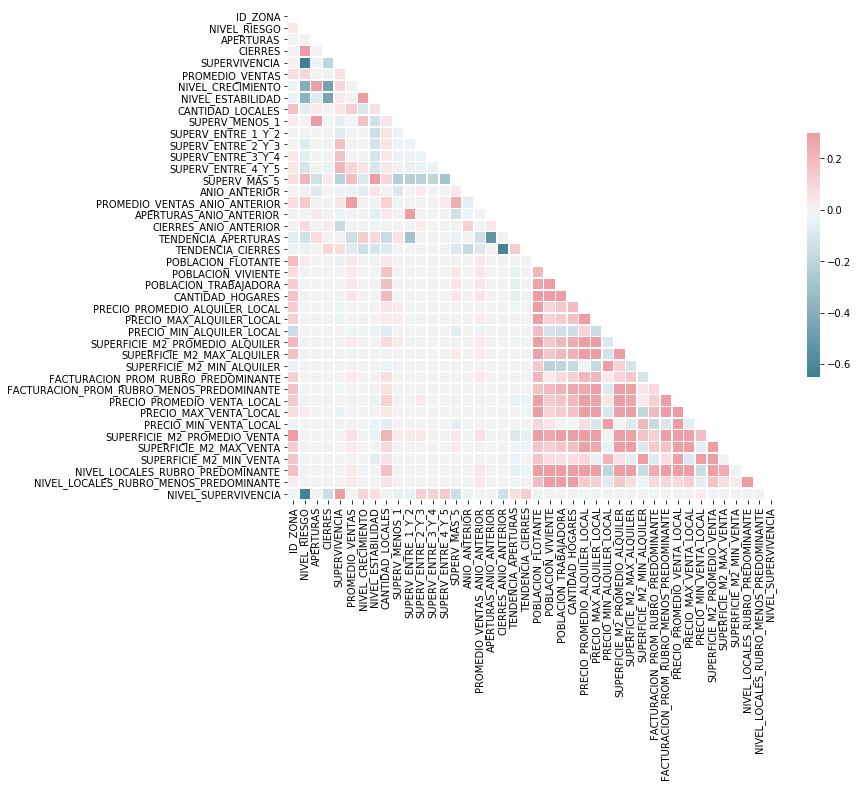

In [17]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

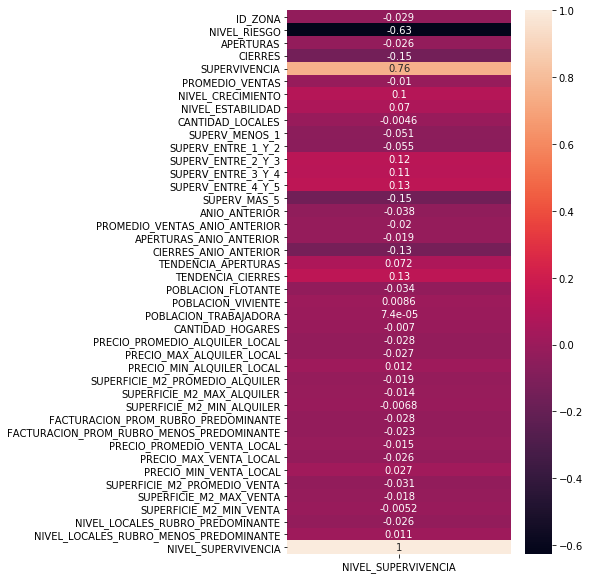

In [18]:
plt.figure(figsize=(5,10))
sns.heatmap(df.corr()[['NIVEL_SUPERVIVENCIA']], annot=True)

In [19]:
df.drop(columns=['NIVEL_RIESGO'], axis=1, inplace=True)

In [20]:
df.columns.values

array(['ID_ZONA', 'RUBRO', 'APERTURAS', 'CIERRES', 'SUPERVIVENCIA',
       'PROMEDIO_VENTAS', 'NIVEL_CRECIMIENTO', 'NIVEL_ESTABILIDAD',
       'CANTIDAD_LOCALES', 'SUPERV_MENOS_1', 'SUPERV_ENTRE_1_Y_2',
       'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4', 'SUPERV_ENTRE_4_Y_5',
       'SUPERV_MAS_5', 'ANIO_ANTERIOR', 'PROMEDIO_VENTAS_ANIO_ANTERIOR',
       'APERTURAS_ANIO_ANTERIOR', 'CIERRES_ANIO_ANTERIOR',
       'TENDENCIA_APERTURAS', 'TENDENCIA_CIERRES', 'POBLACION_FLOTANTE',
       'POBLACION_VIVIENTE', 'POBLACION_TRABAJADORA', 'CANTIDAD_HOGARES',
       'PRECIO_PROMEDIO_ALQUILER_LOCAL', 'PRECIO_MAX_ALQUILER_LOCAL',
       'PRECIO_MIN_ALQUILER_LOCAL', 'SUPERFICIE_M2_PROMEDIO_ALQUILER',
       'SUPERFICIE_M2_MAX_ALQUILER', 'SUPERFICIE_M2_MIN_ALQUILER',
       'RUBRO_PREDOMINANTE', 'FACTURACION_PROM_RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE',
       'RUBRO_MENOS_PREDOMINANTE', 'PRECIO_PROMEDIO_VENTA_LOCAL',
       'PRECIO_MAX_VENTA_LOCAL', 'PRECIO_MIN_VENTA_

In [21]:
df['ID_ZONA'] = df['ID_ZONA'].astype(str)

In [22]:
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12950 entries, 8714 to 26063
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID_ZONA                                    12950 non-null  object 
 1   RUBRO                                      12950 non-null  object 
 2   APERTURAS                                  12950 non-null  float64
 3   CIERRES                                    12950 non-null  float64
 4   SUPERVIVENCIA                              12950 non-null  float64
 5   PROMEDIO_VENTAS                            12950 non-null  int64  
 6   NIVEL_CRECIMIENTO                          12950 non-null  float64
 7   NIVEL_ESTABILIDAD                          12950 non-null  float64
 8   CANTIDAD_LOCALES                           12950 non-null  int64  
 9   SUPERV_MENOS_1                             12950 non-null  float64
 10  SUPERV_ENTRE_1_Y_2 

In [26]:
df['NIVEL_SUPERVIVENCIA'].value_counts()

0.0    6740
1.0    6210
Name: NIVEL_SUPERVIVENCIA, dtype: int64

In [27]:
df['NR_STR'] = df['NIVEL_SUPERVIVENCIA'].astype(str)

In [28]:
df

,ID_ZONA,RUBRO,APERTURAS,CIERRES,SUPERVIVENCIA,PROMEDIO_VENTAS,NIVEL_CRECIMIENTO,NIVEL_ESTABILIDAD,CANTIDAD_LOCALES,SUPERV_MENOS_1,...,PRECIO_PROMEDIO_VENTA_LOCAL,PRECIO_MAX_VENTA_LOCAL,PRECIO_MIN_VENTA_LOCAL,SUPERFICIE_M2_PROMEDIO_VENTA,SUPERFICIE_M2_MAX_VENTA,SUPERFICIE_M2_MIN_VENTA,NIVEL_LOCALES_RUBRO_PREDOMINANTE,NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE,NIVEL_SUPERVIVENCIA,NR_STR
8714,2,Comida al Paso,0.00,0.00,100.00,2,4.0,2.0,1,22.22,...,273333.33,550000.0,60000.0,1662.77,2200.0,1166.7,1.0,1.0,1.0,1.0
8715,2,Ferretería y Construcción,0.00,0.00,100.00,1,4.0,2.0,1,0.00,...,273333.33,550000.0,60000.0,1662.77,2200.0,1166.7,1.0,1.0,1.0,1.0
8721,2,Kioscos y Loterías,0.00,0.00,100.00,1,3.0,2.0,1,0.00,...,273333.33,550000.0,60000.0,1662.77,2200.0,1166.7,1.0,1.0,1.0,1.0
8731,3,Carnes y Verduras,0.00,0.00,50.00,2,4.0,5.0,1,0.00,...,286636.36,530000.0,90000.0,1416.98,2323.2,679.5,1.0,1.0,0.0,0.0
8732,3,Comida al Paso,0.00,0.00,66.67,1,4.0,4.0,1,9.09,...,286636.36,530000.0,90000.0,1416.98,2323.2,679.5,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,160,Restaurantes,2.94,10.81,90.00,2,2.0,2.0,3,5.88,...,189441.18,750000.0,42500.0,1599.40,3409.1,766.9,1.0,1.0,1.0,1.0
26060,160,Salud y Cosmética,0.65,3.76,79.59,2,2.0,3.0,5,2.26,...,189441.18,750000.0,42500.0,1599.40,3409.1,766.9,1.0,1.0,0.0,0.0
26061,160,Supermercados y Almacenes,1.43,2.86,85.71,3,4.0,2.0,4,5.71,...,189441.18,750000.0,42500.0,1599.40,3409.1,766.9,1.0,1.0,1.0,1.0
26062,160,Tratamientos Estéticos,0.00,0.00,53.33,2,3.0,4.0,5,4.08,...,189441.18,750000.0,42500.0,1599.40,3409.1,766.9,1.0,1.0,0.0,0.0


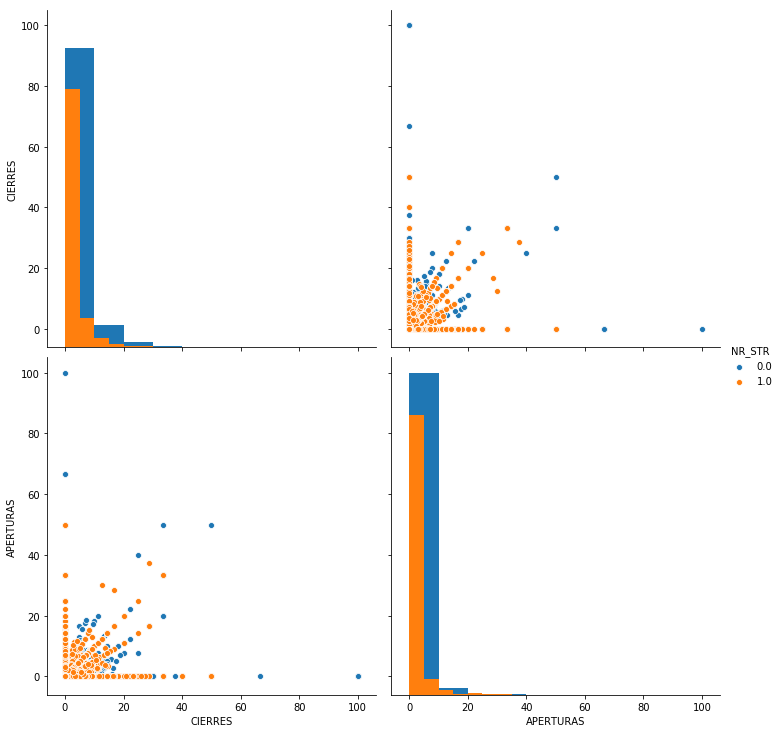

In [29]:
sns.pairplot(data=df[['CIERRES', 'APERTURAS', 'NR_STR']], vars=['CIERRES', 'APERTURAS'], hue='NR_STR', height=5, diag_kind='hist');

In [30]:
df['ID_ZONA'].value_counts().unique()

array([108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  98,  97,  96,
        95,  94,  93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,
        82,  81,  80,  79,  78,  76,  74,  73,  69,  68,  67,  66,  65,
        63,  62,  59,  56,  55,  51,  50,  45,  39,  21,  17,  12,   2])

In [31]:
df['RUBRO'].value_counts().unique()

array([887, 879, 860, 858, 856, 851, 840, 801, 777, 776, 756, 752, 630,
       628, 601, 571, 367, 260])

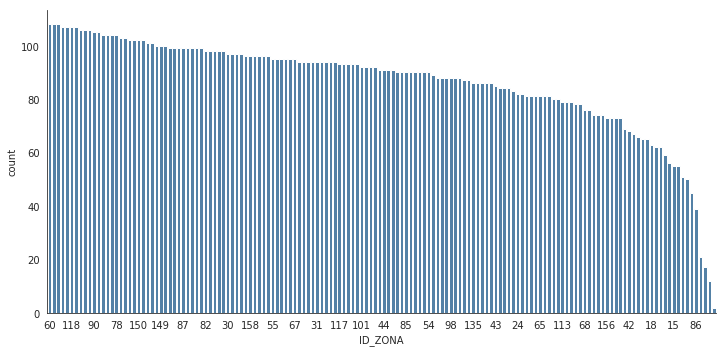

In [32]:
with sns.axes_style('white'):
    g = sns.catplot("ID_ZONA", data=df, aspect=2, kind="count", color='steelblue', order = df['ID_ZONA'].value_counts().index)
    g.set_xticklabels(step=5)

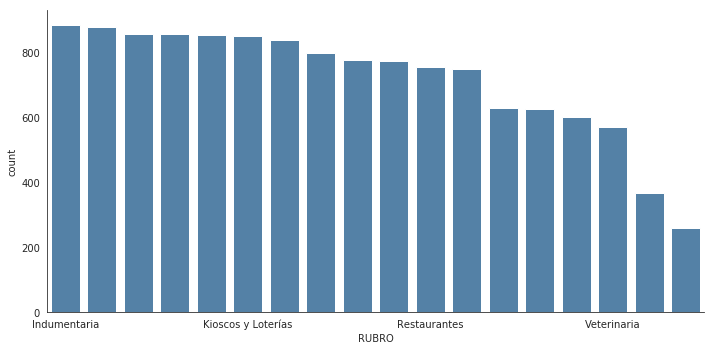

In [33]:
with sns.axes_style('white'):
    g = sns.catplot("RUBRO", data=df, aspect=2, kind="count", color='steelblue', order = df['RUBRO'].value_counts().index)
    g.set_xticklabels(step=5)

/home/miriam/anaconda3/envs/dsdhblend/lib/python3.7/site-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


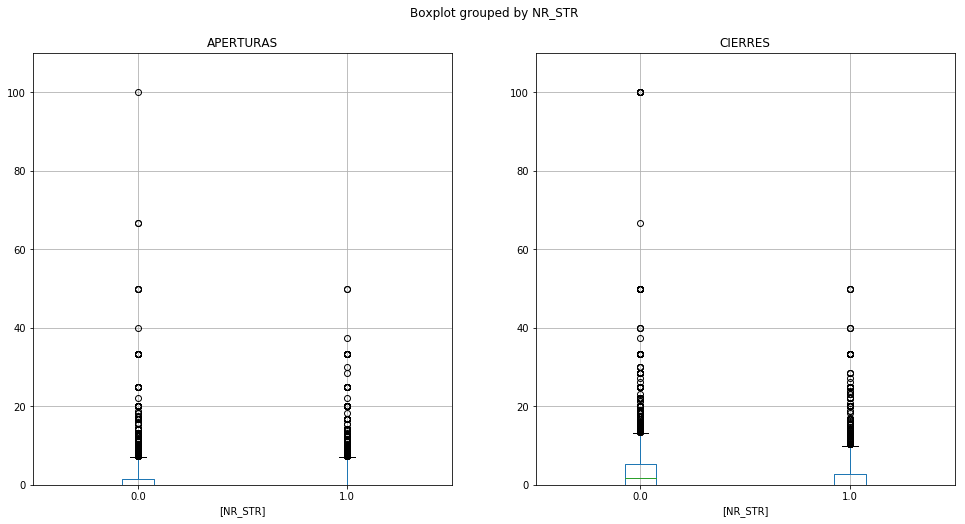

In [34]:
fig, ax_new = plt.subplots(1,2, sharey=False,figsize=(16,8))
axes_ = df[['CIERRES', 'APERTURAS', 'NR_STR']].boxplot(by='NR_STR',ax=ax_new,return_type='axes',whis=[5,95]);
for ax,col in zip(axes_,['CIERRES', 'APERTURAS']):
    ax.set_ylim(df[col].min()/1.1,df[col].max()*1.1)

---
---
<b><a id='section_2'><h4>2. Dataset final</h4></a></b>

In [35]:
predecir = ['NIVEL_SUPERVIVENCIA']
features = ['ID_ZONA', 'RUBRO', 'APERTURAS', 'CIERRES',
       'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES', 'POBLACION_FLOTANTE',
       'POBLACION_VIVIENTE', 'POBLACION_TRABAJADORA', 'CANTIDAD_HOGARES',
       'PRECIO_PROMEDIO_ALQUILER_LOCAL', 'PRECIO_MAX_ALQUILER_LOCAL',
       'PRECIO_MIN_ALQUILER_LOCAL', 'SUPERFICIE_M2_PROMEDIO_ALQUILER',
       'SUPERFICIE_M2_MAX_ALQUILER', 'SUPERFICIE_M2_MIN_ALQUILER',
       'RUBRO_PREDOMINANTE', 'FACTURACION_PROM_RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE',
       'RUBRO_MENOS_PREDOMINANTE', 'PRECIO_PROMEDIO_VENTA_LOCAL',
       'PRECIO_MAX_VENTA_LOCAL', 'PRECIO_MIN_VENTA_LOCAL',
       'SUPERFICIE_M2_PROMEDIO_VENTA', 'SUPERFICIE_M2_MAX_VENTA',
       'SUPERFICIE_M2_MIN_VENTA', 'NIVEL_LOCALES_RUBRO_PREDOMINANTE',
       'NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE']

In [36]:
# Creamos dummies
df_final = pd.get_dummies(df[features], columns=['ID_ZONA', 
                                                 'RUBRO', 
                                                 'RUBRO_PREDOMINANTE', 
                                                 'RUBRO_MENOS_PREDOMINANTE',
                                                 'FACTURACION_PROM_RUBRO_PREDOMINANTE',
                                                 'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE',
                                                 'NIVEL_LOCALES_RUBRO_PREDOMINANTE', 
                                                 'NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE'], drop_first=True)

In [37]:
df_final.shape

(12950, 218)

In [38]:
X = df_final
y = df[predecir]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [41]:
X_train.shape

(9712, 218)

In [42]:
y_train.shape

(9712, 1)

In [43]:
df_results = pd.DataFrame(columns=['Metodo','accuracy_train','accuracy_test'])

In [ ]:
def setResults(data,metodo,accuracy_train,accuracy_test):
    data.loc[-1] = [metodo,accuracy_train,accuracy_test]
    data.index = data.index + 1  # shifting index
    data = data.sort_index() 

---
---
<b><a id='section_3'><h4>3. Modelos implementados</h4></a></b>
<a href='#section_3_1'>3.1. Regresión logística</a>  
<a href='#section_3_2'>3.2. KNeighborsClassifier</a>  

<b><a id='section_3_1'>3.1. Regresión logística</a>  </b>

In [44]:
logistic_regression = LogisticRegression()

In [45]:
logistic_regression.fit(X_train_std, y_train.values.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred_test = logistic_regression.predict(X_test_std)

In [47]:
lr_accuracy_test = accuracy_score(y_test, y_pred_test)
lr_accuracy_test

0.6365040148239655

In [48]:
y_pred_train = logistic_regression.predict(X_train_std)
lr_accuracy_train = accuracy_score(y_train, y_pred_train)
lr_accuracy_train

0.6578459637561779

In [49]:
setResults(df_results, 'LR-Default',lr_accuracy_train,lr_accuracy_test)


NameError: name 'setResults' is not defined

In [50]:
y_test['NIVEL_SUPERVIVENCIA'].value_counts()

0.0    1685
1.0    1553
Name: NIVEL_SUPERVIVENCIA, dtype: int64

Text(33,0.5,'Reales')

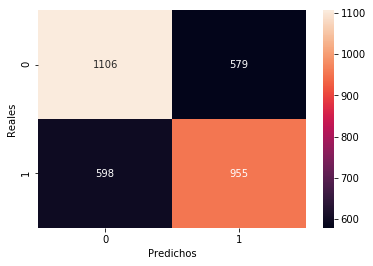

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [52]:
y_pred_proba_logit = logistic_regression.predict_proba(X_test_std)

In [53]:
y_pred_proba_logit.shape

(3238, 2)

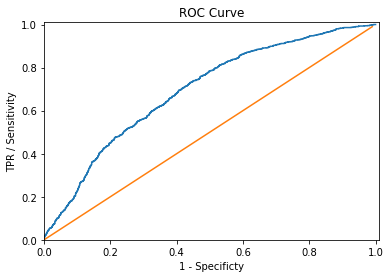

AUC:  0.6923037826662667


In [54]:
curva_roc_y_auc(y_pred_proba_logit)

In [55]:
from sklearn.metrics import precision_score, recall_score
print('Accuracy=', accuracy_score(y_test, y_pred_test))
print('Recall=', recall_score(y_test, y_pred_test))
print('Precision=', precision_score(y_test, y_pred_test))

Accuracy= 0.6365040148239655
Recall= 0.6149388280746941
Precision= 0.622555410691004


In [56]:
from sklearn.preprocessing import binarize
y_pred_logit = binarize(y_pred_proba_logit, 0.6)[:,1]

Text(33,0.5,'Reales')

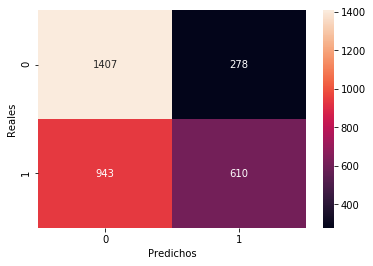

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred_logit, ), annot=True, fmt='.0f')
plt.xlabel('Predichos')
plt.ylabel('Reales')

<b><a id='section_3_2'>3.2. KNeighborsClassifier</a>  </b>

In [58]:
def scores_knn(X, y, start, stop, step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=3, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [59]:
df_scores_1= scores_knn(X_train_std, y_train.values.reshape(-1), 2, 10, 1)

In [60]:
df_scores_1

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.756281,0.013465,2,0.742815,0.769746
1,0.743307,0.006448,3,0.736859,0.749755
2,0.715198,0.008146,4,0.707052,0.723344
3,0.704798,0.007367,5,0.697431,0.712165
4,0.667010,0.010572,6,0.656438,0.677582
5,0.659699,0.016662,7,0.643037,0.676361
6,0.644357,0.017338,8,0.627019,0.661695
7,0.640342,0.011667,9,0.628675,0.652008


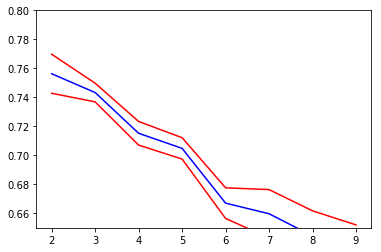

In [61]:
plt.plot(df_scores_1['n_neighbours'], df_scores_1['limite_inferior'], color='r')
plt.plot(df_scores_1['n_neighbours'], df_scores_1['score_medio'], color='b')
plt.plot(df_scores_1['n_neighbours'], df_scores_1['limite_superior'], color='r')
plt.ylim(0.65, 0.8);

In [62]:
df_scores_1.loc[df_scores_1.score_medio == df_scores_1.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.756281,0.013465,2,0.742815,0.769746


In [63]:
best_k_1 = df_scores_1.loc[df_scores_1.score_medio == df_scores_1.score_medio.max(),'n_neighbours'].values[0]
best_k_1

2

In [64]:
model_knn_1 = KNeighborsClassifier(n_neighbors=best_k_1)
model_knn_1.fit(X_train_std, y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
knn1_accuracy_train = accuracy_score(y_train, model_knn_1.predict(X_train_std))
knn1_accuracy_train

In [ ]:
y_pred_knn_1 = model_knn_1.predict(X_test_std)

In [ ]:
knn1_accuracy_test = accuracy_score(y_test, y_pred_knn_1)
knn1_accuracy_test

In [ ]:
setResults(df_results, 'KNN_neighbors%s' % (best_k_1),knn1_accuracy_train,knn1_accuracy_test)


In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_1), annot=True, fmt='.0f')

In [ ]:
y_pred_proba_knn_1 = model_knn_1.predict_proba(X_test_std)

In [ ]:
curva_roc_y_auc(y_pred_proba_knn_1)

In [ ]:
print('Accuracy=', accuracy_score(y_test, y_pred_knn_1))
print('Recall=', recall_score(y_test, y_pred_knn_1))
print('Precision=', precision_score(y_test, y_pred_knn_1))

---
---
<b><a id='section_4'><h4>4. Modelos + reducción de dimensionalidad</h4></a></b>
<a href='#section_4_1'>4.1. PCA + KNClassifier</a>  
<a href='#section_4_2'>4.2. PCA + NaiveBayes</a>  
<a href='#section_4_3'>4.3. PCA + Regresión Logística</a> 


<b><a id='section_4_1'>4.1. PCA + KNClassifier</a>  </b>

In [ ]:
#Veamos si mejora el score reduciendo dimensionalidad

In [ ]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

In [ ]:
plot_explained_variance(components_count = 10, X = X_train_std)

In [ ]:
plot_explained_variance(components_count = 40, X = X_train_std)

In [ ]:
plot_explained_variance(components_count = 170, X = X_train_std)

In [ ]:
model_pca = PCA(170).fit(X_train_std)
X_train_PCA = model_pca.transform(X_train_std)
X_test_PCA = model_pca.transform(X_test_std)

In [ ]:
df_scores_2 = scores_knn(X_train_PCA, y_train.values.reshape(-1), 2, 5, 1)

In [ ]:
df_scores_2

In [ ]:
df_scores_2.loc[df_scores_2.score_medio == df_scores_2.score_medio.max()]

In [ ]:
best_k_2 = df_scores_2.loc[df_scores_2.score_medio == df_scores_2.score_medio.max(),'n_neighbours'].values[0]
best_k_2

In [ ]:
model_knn_2 = KNeighborsClassifier(n_neighbors=best_k_2)
model_knn_2.fit(X_train_PCA, y_train.values.reshape(-1))

In [ ]:
accuracy_knnpca_train = accuracy_score(y_train, model_knn_2.predict(X_train_PCA))
accuracy_knnpca_train

In [ ]:
y_pred_knn_2 = model_knn_2.predict(X_test_PCA)

In [ ]:
accuracy_knnpca_test = accuracy_score(y_test, y_pred_knn_2)
accuracy_knnpca_test

In [ ]:
setResults(df_results, 'KNN_PCA_neighbors%s' % (best_k_2),accuracy_knnpca_train,accuracy_knnpca_test)


In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_2), annot=True, fmt='.0f')

In [ ]:
y_pred_proba_knn_2 = model_knn_2.predict_proba(X_test_PCA)

In [ ]:
curva_roc_y_auc(y_pred_proba_knn_2)

In [ ]:
print('Accuracy=', accuracy_score(y_test, y_pred_knn_1))
print('Recall=', recall_score(y_test, y_pred_knn_1))
print('Precision=', precision_score(y_test, y_pred_knn_1))

<b><a id='section_4_2'>4.2. PCA + NaiveBayes</a>  </b>

In [ ]:
gnb_1 = GaussianNB()
gnb_1.fit(X_train_std, y_train.values.reshape(-1))

In [ ]:
y_pred_nb_train_1 = gnb_1.predict(X_train_std)

In [ ]:
accuracy_g_train = accuracy_score(y_train, y_pred_nb_train_1)
accuracy_g_train

In [ ]:
y_pred_nb_1 = gnb_1.predict(X_test_std)

In [ ]:
accuracy_g_test = accuracy_score(y_test, y_pred_nb_1)
accuracy_g_test

In [ ]:
setResults(df_results, 'GNB',accuracy_g_train,accuracy_g_test)

In [ ]:
y_pred_proba_nb_1 = gnb_1.predict_proba(X_test_std)

In [ ]:
curva_roc_y_auc(y_pred_proba_nb_1)

In [ ]:
print('Accuracy=', accuracy_score(y_test, y_pred_nb_1))
print('Recall=', recall_score(y_test, y_pred_nb_1))
print('Precision=', precision_score(y_test, y_pred_nb_1))

In [ ]:
gnb_2 = GaussianNB()
gnb_2.fit(X_train_PCA, y_train.values.reshape(-1))

In [ ]:
y_pred_nb_train_2 = gnb_2.predict(X_train_PCA)

In [ ]:
accuracy_GNB_PCA_train = accuracy_score(y_train, y_pred_nb_train_2)
accuracy_GNB_PCA_train

In [ ]:
y_pred_nb_2 = gnb_2.predict(X_test_PCA)

In [ ]:
accuracy_GNB_PCA_test = accuracy_score(y_test, y_pred_nb_2)
accuracy_GNB_PCA_test

In [ ]:
setResults(df_results, 'NB',accuracy_GNB_PCA_train,accuracy_GNB_PCA_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb_2), annot=True, fmt='.0f')

In [ ]:
y_pred_proba_nb_2 = gnb_2.predict_proba(X_test_PCA)

In [ ]:
curva_roc_y_auc(y_pred_proba_nb_2)

In [ ]:
print('Accuracy=', accuracy_score(y_test, y_pred_nb_2))
print('Recall=', recall_score(y_test, y_pred_nb_2))
print('Precision=', precision_score(y_test, y_pred_nb_2))

<b><a id='section_4_3'><h4>4.3. PCA + Regresión Logística</h4></a></b>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca_2 = PCA()
# set the tolerance to a large value to make the example faster
logistic_3 = LogisticRegression(max_iter=10000, tol=0.1)
pipe_1 = Pipeline(steps=[('pca', pca_2), ('logistic', logistic_3)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid_1 = {
    'pca__n_components': [5, 15, 30, 45, 64, 170, 180, 200],
    'logistic__C': np.logspace(-4, 6, 1),
    'logistic__penalty': ['l1', 'l2'],
     'logistic__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_3 = GridSearchCV(pipe_1, param_grid_1, n_jobs=-1)
grid_3.fit(X_train_std, y_train.values.reshape(-1))
print("Best parameter (CV score=%0.3f):" % grid_3.best_score_)
print(grid_3.best_params_)
accuracy_LR_PCA_train = grid_3.best_score_
method = 'LR_solver:%s_C:%s_pen:%s_PCA:%s'% (grid_3.best_params_['logistic__solver'], grid_3.best_params_['logistic__C'],grid_3.best_params_['logistic__penalty'],grid_3.best_params_['pca__n_components'])
# Plot the PCA spectrum
pca_2.fit(X_train_std)

fig, (ax0, ax1) =  plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca_2.n_components_ + 1),
         pca_2.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(grid_3.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(grid_3.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 200)

plt.tight_layout()
plt.show()

In [ ]:
y_pred_grid_3 = grid_3.predict(X_test_std)

In [ ]:
accuracy_LR_PCA_test = accuracy_score(y_test, y_pred_grid_3)
accuracy_LR_PCA_test

In [ ]:
setResults(df_results, method,accuracy_LR_PCA_train,accuracy_LR_PCA_test)

In [ ]:
print (classification_report(y_test, y_pred_grid_3))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_3), annot=True, fmt='.0f')

In [ ]:
y_pred_proba_grid_3 = grid_3.predict_proba(X_test_std)

In [ ]:
curva_roc_y_auc(y_pred_proba_grid_3)

In [ ]:
print('Accuracy=', accuracy_score(y_test, y_pred_grid_3))
print('Recall=', recall_score(y_test, y_pred_grid_3))
print('Precision=', precision_score(y_test, y_pred_grid_3))

---
---
<b><a id='section_5'><h4>5. Modelos + Grid search</h4></a></b>

In [ ]:
# penalty L1: Lasso y L2: Ridge
params_2 = [
    {'C': [1, 2, 3, 4, 5, 6, 7, 8, 10],
     'penalty': ['l1', 'l2'],
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
]
LogisticRegression()

folds_2 = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid_2 = GridSearchCV(LogisticRegression( ), param_grid=params_2[0], cv=folds_2, n_jobs=2)
grid_2.fit(X_train_std, y_train.values.reshape(-1))
display(grid_2.best_estimator_, grid_2.best_score_, grid_2.best_params_)
accuracy_LR_train = grid_2.best_score_
method = 'LR_solver:%s_C:%s_pen:%s'% (grid_3.best_params_['logistic__solver'], grid_3.best_params_['logistic__C'],grid_3.best_params_['logistic__penalty'])

In [ ]:
y_pred_grid_2 = grid_2.predict(X_test_std)

In [ ]:
accuracy_LR_test = accuracy_score(y_test, y_pred_grid_2)
setResults(df_results, method,accuracy_LR_train,accuracy_LR_test)
accuracy_LR_test

In [ ]:
print (classification_report(y_test, y_pred_grid_2))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_2), annot=True, fmt='.0f')

In [ ]:
y_pred_proba_grid_2 = grid_2.predict_proba(X_test_std)

In [ ]:
curva_roc_y_auc(y_pred_proba_grid_2)

In [ ]:
print('Accuracy=', accuracy_score(y_test, y_pred_grid_2))
print('Recall=', recall_score(y_test, y_pred_grid_2))
print('Precision=', precision_score(y_test, y_pred_grid_2))

In [ ]:
accuracy_method(df_results)